In [1]:
# import dependencies
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# define relevant paths
home_path = os.path.dirname(os.getcwd())
data_path = home_path + '\\data\\climate_merged.csv'
plot_path = home_path + '\\plots\\climate\\'

In [104]:
# define HYPERPARAMS
plot_unit   = '2 weeks'
plot_suffix = '2w'
plot_nsteps = 40320 # 2 steps per minute

# set seaborn style/them
sns.set_theme()
sns.set_style('white')

In [105]:
# define plot categories and params
plot_cats = [
    # EXAMPLE: ('title', 'type', 'filter (RegEx)', 'units', 'palette', 'alpha', 'filename'),
    {
        'title':'DC - Temperatures, {}'.format(plot_unit),
        'type':'temperatures',
        'filter':'GM401',
        'units':'$^\circ$C', 
        'palette':'YlOrRd_r',
        'alpha':0.9,
        'fname':'dc_temp_{}.png'.format(plot_suffix)
    },
    {
        'title':'DC - Humidity, {}'.format(plot_unit),
        'type':'humidity',
        'filter':'GM401',
        'units':'$\%$', 
        'palette':'crest',
        'alpha':0.9,
        'fname':'dc_humid_{}.png'.format(plot_suffix)
    },
    {
        'title':'GH - Avg., {}'.format(plot_unit),
        'type':'all',
        'filter':'X',
        'units':'$^\circ$C, $\%$', 
        'palette':'mako',
        'alpha':1.0,
        'fname':'ghavg_all_{}.png'.format(plot_suffix)
    },
    {
        'title':'DC - , {}'.format(plot_unit),
        'type':'all',
        'filter':'DC_GT401_GM401',
        'units':'$^\circ$C, $\%$', 
        'palette':'mako',
        'alpha':1.0,
        'fname':'dc_all_{}.png'.format(plot_suffix)
    },
    {
        'title':'GH & OUT - Temperatures, {}'.format(plot_unit),
        'type':'temperatures',
        'filter':'X|GT301|SMHI',
        'units':'$^\circ$C', 
        'palette':'YlOrRd_r',
        'alpha':1.0,
        'fname':'ghout_temp_{}.png'.format(plot_suffix)
    },
    {
        'title':'GH, DC & OUT - Humidity, {}'.format(plot_unit),
        'type':'humidity',
        'filter':'X|DC_GT401_GM401|SMHI',
        'units':'$\%$', 
        'palette':'crest',
        'alpha':1.0,
        'fname':'ghdcout_hum_{}.png'.format(plot_suffix)
    },
    {
        'title':'OUT - Temperature, {}'.format(plot_unit),
        'type':'temperatures',
        'filter':'GT301|SMHI',
        'units':'$^\circ$C', 
        'palette':'mako',
        'alpha':1.0,
        'fname':'out_temp_{}.png'.format(plot_suffix)
    }
]

In [54]:
# get data
data = pd.read_csv(
    data_path,
    header=[0, 1],
    index_col=0
)
data.index = pd.to_datetime(data.index.values)


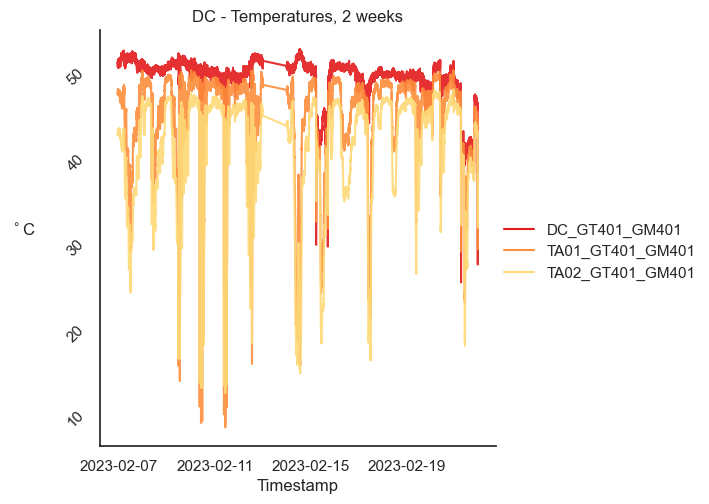

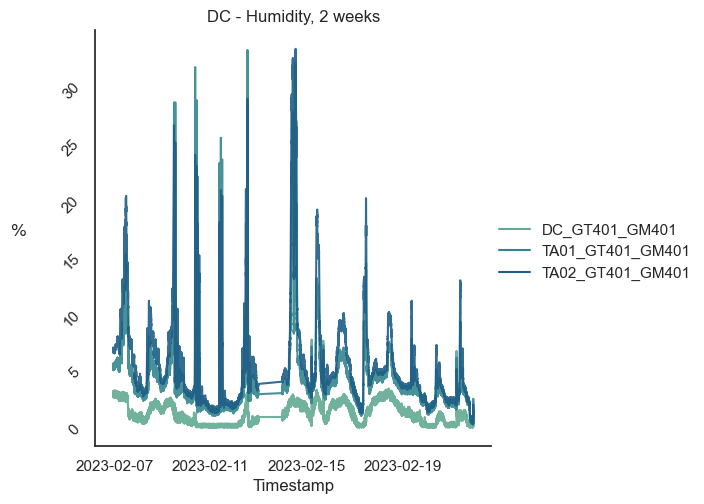

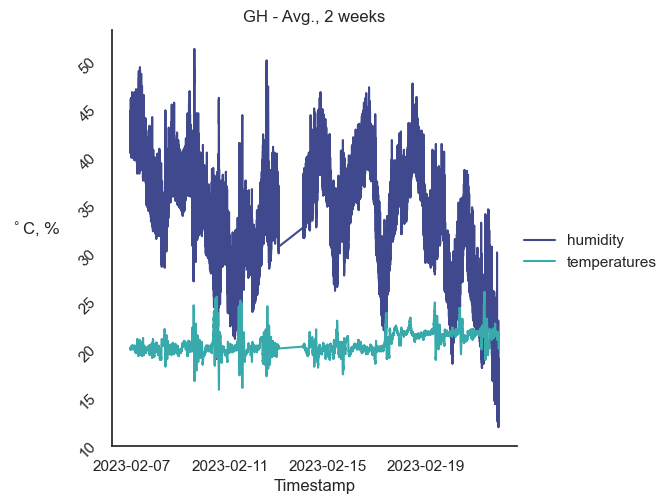

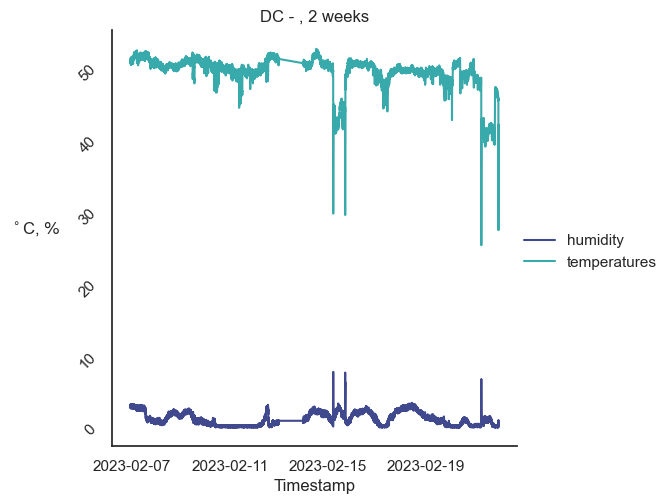

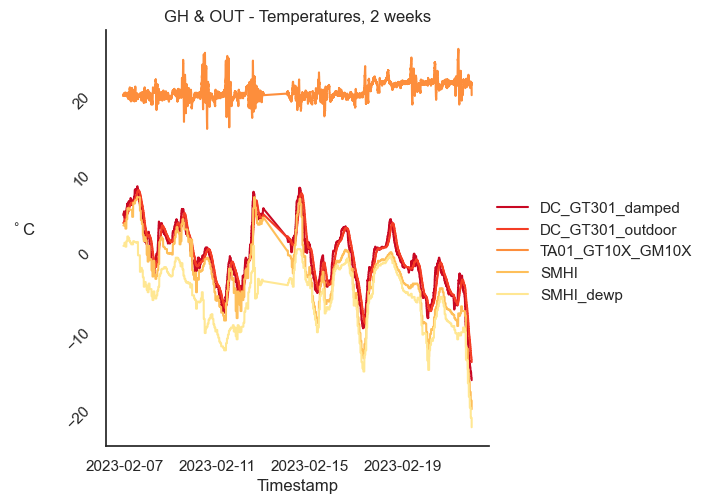

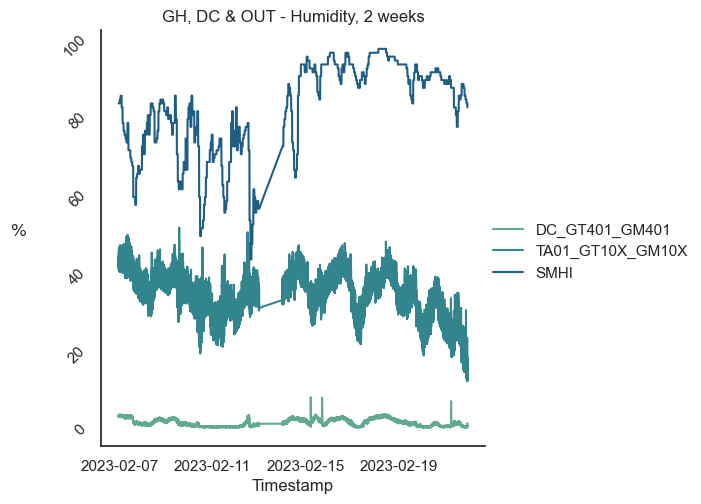

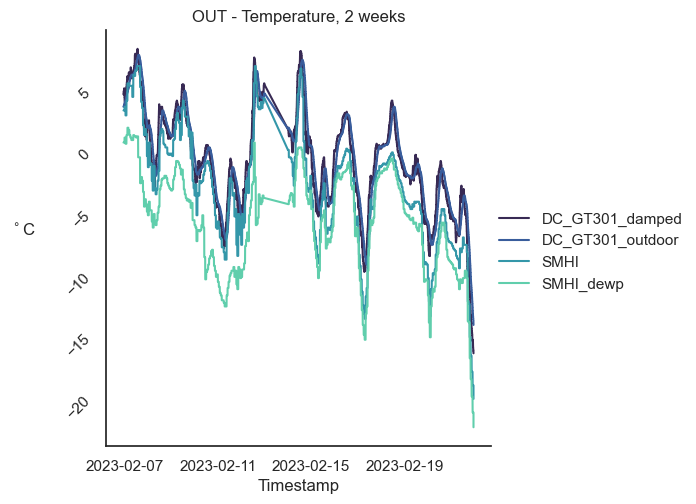

In [106]:
# crop data
data_cropped = data.iloc[-plot_nsteps:]

# iterate over plot params and save figs
for params in plot_cats:
    
    if params['type'] == 'all':
        subset = data_cropped.filter(regex=params['filter'], axis=1).droplevel(level=1, axis=1)
    else:
        subset = data_cropped[params['type']].filter(regex=params['filter'])
    ax = sns.relplot(
        data=subset,
        kind='line',
        palette= params['palette'],
        alpha= params['alpha'],
        dashes=False,
        markers=False,
        legend='full'
    )

    ax.set_xticklabels(step=2)
    
    plt.yticks(rotation=45)
    plt.xlabel('Timestamp')
    plt.ylabel(params['units'], loc='center', rotation=0, fontsize=12, labelpad=30)
    plt.title(params['title'])
    
    fpath = plot_path + params['fname']
    plt.savefig(fpath, bbox_inches='tight', dpi=1000)
    plt.show()